# K-Means Clustering

## Importing the libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

## Importing the dataset

In [11]:
dataset = pd.read_csv('countries-by-intentional-homicide-rate.csv')
X = dataset.iloc[:, [3, 4]].values

In [12]:
X

array([[6.7000e+00, 2.4740e+03],
       [2.1000e+00, 6.1000e+01],
       [1.3000e+00, 5.8000e+02],
       [2.6000e+00, 2.0000e+00],
       [4.8000e+00, 1.2170e+03],
       [2.8300e+01, 4.0000e+00],
       [9.2000e+00, 9.0000e+00],
       [5.3000e+00, 2.4160e+03],
       [1.8000e+00, 5.2000e+01],
       [1.9000e+00, 2.0000e+00],
       [9.0000e-01, 2.2100e+02],
       [7.0000e-01, 6.5000e+01],
       [2.3000e+00, 2.3000e+02],
       [1.8600e+01, 7.3000e+01],
       [1.0000e-01, 2.0000e+00],
       [2.4000e+00, 3.8300e+03],
       [1.4300e+01, 4.1000e+01],
       [2.4000e+00, 2.2500e+02],
       [1.7000e+00, 1.9300e+02],
       [2.5700e+01, 1.0200e+02],
       [1.1000e+00, 1.2600e+02],
       [0.0000e+00, 0.0000e+00],
       [2.5000e+00, 1.9000e+01],
       [7.0000e+00, 8.0600e+02],
       [1.3000e+00, 4.3000e+01],
       [1.5200e+01, 3.0300e+02],
       [2.2500e+01, 4.7722e+04],
       [8.3000e+00, 2.0000e+00],
       [5.0000e-01, 2.0000e+00],
       [1.0000e+00, 6.9000e+01],
       [1.

## Using the elbow method to find the optimal number of clusters

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

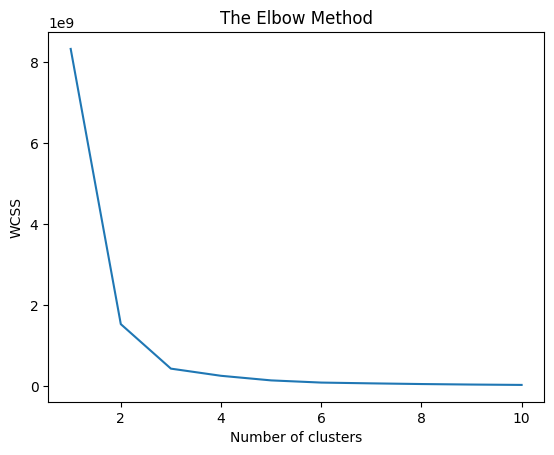

In [14]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [15]:
n_clusters = 5

In [16]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualising the clusters

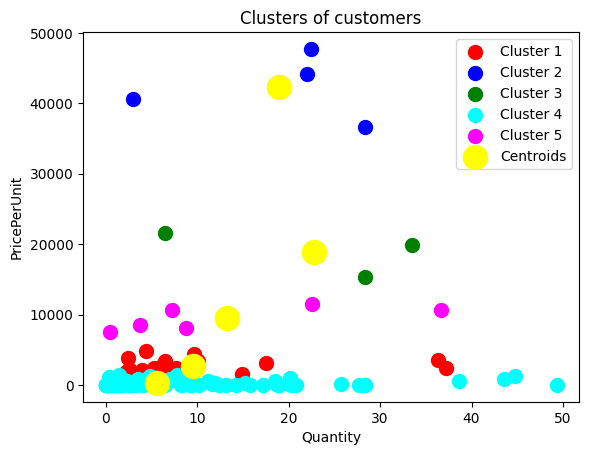

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Homicide')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.legend()
plt.show()

In [18]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
score = davies_bouldin_score(X, y_kmeans)
print("Davies-Bouldin score:", score)

Davies-Bouldin score: 0.37818977260287456
